# What is CLV

CLV: Total Amount Spend by Customers on an average during his overall relationship with company.
    
Example:
    
1- Customer lifetime relation with company=15 years

2- Amount customer spend annuly = $100

3- Amount company spend to acquring the customer= $50

4- CLV=(15*100)-50=$1450


5- CLV= Expected No of Transaction* Revenue per Transaction * Margin

6- Expected no of Transaction will be calculated using BG/NBD model

7-Revenue Per Transaction will be calculated using Gamma Gamma Model


8-- https://benalexkeen.com/bg-nbd-model-for-customer-base-analysis-in-python/

In [34]:
## Importing Requried Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [35]:
## Loading the dataset
df=pd.read_csv("customer_segmentation.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
df.shape

(541909, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [38]:
## Changing the datatype
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.date

In [39]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [40]:
## Checking NUll values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
## We have so many null values in customerID which will not help for our project so we will drop them.
df = df[pd.notnull(df['CustomerID'])]


In [42]:
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18,1.04,12346.0,United Kingdom


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

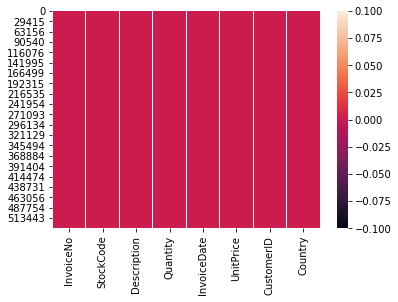

In [43]:
## Missing values eliminated
sns.heatmap(df.isnull())
df.isnull().sum()

In [44]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [45]:
## Removing Negative and Zero values with Median Values
df.loc[df['Quantity']<=0,"Quantity"] = 4
df.loc[df['UnitPrice']<=0,"UnitPrice"] = 1.95

In [46]:
#Add new column depicting total amount
df['TotalSale'] = df['Quantity'] * df['UnitPrice']

In [47]:
df=df[['CustomerID','TotalSale','InvoiceDate']]
df.head()

,CustomerID,TotalSale,InvoiceDate
0,17850.0,15.30,2010-12-01
1,17850.0,20.34,2010-12-01
2,17850.0,22.00,2010-12-01
3,17850.0,20.34,2010-12-01
4,17850.0,20.34,2010-12-01


In [48]:
# df[df['CustomerID']==12346]

In [49]:
#Print records pertaining unique Customer IDs
print(df['CustomerID'].nunique())

4372


In [50]:
df['InvoiceDate'].max()

#Check the Last order date
last_order_date = df['InvoiceDate'].max()
print("last_order_date:", last_order_date)
print("--------------------------------------")
print(df[(df['CustomerID']==12346)])

last_order_date: 2011-12-09
--------------------------------------
       CustomerID  TotalSale InvoiceDate
61619     12346.0   77183.60  2011-01-18
61624     12346.0       4.16  2011-01-18


In [51]:
#!pip install lifetimes

In [52]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

lf_df = summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', monetary_value_col='TotalSale', observation_period_end='2011-12-9')
lf_df.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000


<img src="BD_NBD.png"/>

T--->> DIfference between Cutoff Date- First Purchase date

Recency---->> if they have made only 1 purchase, the recency is 0.

count    4372.000000
mean        3.413541
std         6.674343
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       145.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 31.59 %


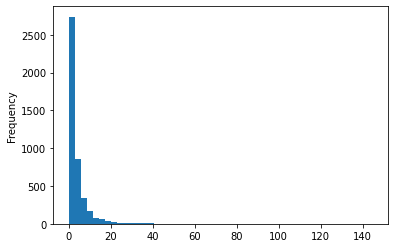

In [53]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
lf_df['frequency'].plot(kind='hist', bins=50)
print(lf_df['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(lf_df['frequency'] == 0)/float(len(lf_df))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [54]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(lf_df['frequency'], lf_df['recency'], lf_df['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4372 subjects, a: 0.02, alpha: 55.62, b: 0.49, r: 0.84>


In [55]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.843025,0.026206,0.791661,0.894389
alpha,55.619383,2.088118,51.526671,59.712095
a,0.021519,0.006381,0.009012,0.034026
b,0.488673,0.176970,0.141812,0.835534


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

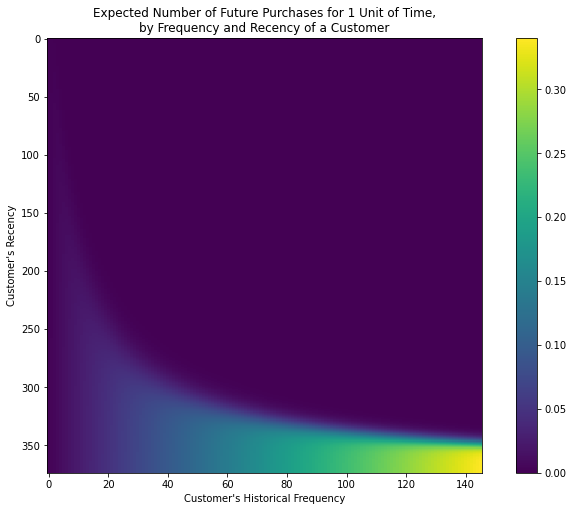

In [56]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

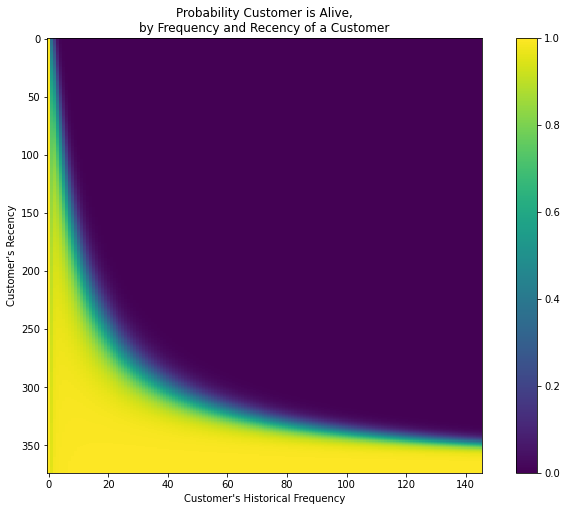

In [57]:
#predict if the customers are surely alive:

#While active, transactions made by a customer in time period t is Poisson distributed with mean λt
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

# Prediction Of Number of Transaction Using BG/NBD model

In [58]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 10
lf_df['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, lf_df['frequency'], lf_df['recency'], lf_df['T']),2)
lf_df.sort_values(by='pred_num_txn',ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_txn
0,14911.0,145.0,372.0,373.0,1125.909931,3.40
1,12748.0,114.0,373.0,373.0,397.866053,2.68
2,17841.0,112.0,372.0,373.0,378.403125,2.63
3,15311.0,90.0,373.0,373.0,683.587556,2.12
4,14606.0,88.0,372.0,373.0,146.947841,2.07
5,13089.0,82.0,367.0,369.0,717.656463,1.95
6,12971.0,71.0,369.0,372.0,157.543521,1.68
7,16422.0,66.0,352.0,369.0,535.361212,1.57
8,14527.0,63.0,371.0,373.0,183.406032,1.49
9,13408.0,54.0,372.0,373.0,534.940741,1.28


In [59]:
#Top 10 customers expected to make the most purchases in a month
bgf.conditional_expected_number_of_purchases_up_to_time(30, 
                                                 # 4 weeks = 1 month
                                                        lf_df['frequency'],
                                                        lf_df['recency'],
                                                        lf_df['T']).sort_values(ascending=False).head(10).reset_index()

,CustomerID,0
0,14911.0,10.198157
1,12748.0,8.030608
2,17841.0,7.890267
3,15311.0,6.352027
4,14606.0,6.211793
5,13089.0,5.846287
6,12971.0,5.033875
7,16422.0,4.695301
8,14527.0,4.463085
9,13408.0,3.833937


In [60]:
#Customer's future transaction prediction for next 10 days

t = 10
individual = lf_df.loc[14911]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

3.401055915888864

# Prediction of Average Revenue Value Using Gamma Gamma Model

In [61]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = lf_df[lf_df['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   CustomerID  frequency  recency      T  monetary_value  pred_num_txn
0     12347.0        6.0    365.0  367.0      599.701667          0.16
1     12348.0        3.0    283.0  358.0      301.480000          0.09
2     12352.0        6.0    260.0  296.0      939.583333          0.19
3     12356.0        2.0    303.0  325.0      269.905000          0.07
4     12358.0        1.0    149.0  150.0      683.200000          0.09
-----------------------------------------
The Number of Returning Customers are:  2991


In [62]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2991 subjects, p: 1.23, q: 3.76, v: 807.87>


In [63]:
##The top 10 customers expected to be most valuable

lf_df['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        lf_df['frequency'],
        lf_df['monetary_value']), 2)
lf_df.reset_index().head()


,CustomerID,frequency,recency,T,monetary_value,pred_num_txn,pred_txn_value
0,12346.0,0.0,0.0,325.0,0.000000,0.02,361.52
1,12347.0,6.0,365.0,367.0,599.701667,0.16,535.07
2,12348.0,3.0,283.0,358.0,301.480000,0.09,327.11
3,12349.0,0.0,0.0,18.0,0.000000,0.11,361.52
4,12350.0,0.0,0.0,310.0,0.000000,0.02,361.52


# Calculation Of CLV

In [64]:
#Calculate Customer Lifetime Value
lf_df['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    lf_df['frequency'],
    lf_df['recency'],
    lf_df['T'],
    lf_df['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

lf_df.drop(lf_df.iloc[:, 0:6], inplace=True, axis=1)

lf_df.sort_values(by='CLV', ascending=False).head(10).reset_index()

,CustomerID,CLV
0,14646.0,224701.38
1,14096.0,191899.08
2,18102.0,186378.89
3,17450.0,153516.52
4,14911.0,127085.78
5,16446.0,117650.46
6,16029.0,102689.95
7,12415.0,95291.68
8,14156.0,93657.80
9,17511.0,68657.11


# How to increase CLV?

1- USe Freemium Model

2- Customer Segmenation (based on Interest, one time buyer, most loyal customers)

3- Send promotional offers, disconts & coupon code.

In [ ]:
# first_purchase=df.groupby(['CustomerID']).InvoiceDate.min().reset_index()
# first_purchase.columns=['CustomerID',"FirstPurchaseDay"]
# df['FirstPurchaseDay']=first_purchase.FirstPurchaseDay
# df.shape

# Another Approach By Classification

In [92]:
RFM=pd.read_csv("combine_rfm.csv")

In [95]:
RFM.head(2)

,Unnamed: 0,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score
0,0,17850.0,325.0,2.0,15.3,0,0,1,1
1,1,17850.0,275.0,7.0,15.3,0,0,1,1


In [96]:
RFM['Segment'] = 'Low-Value'
RFM.loc[RFM['RFM_Score']>2,'Segment'] = 'Mid-Value' 
RFM.loc[RFM['RFM_Score']>5,'Segment'] = 'High-Value'

In [97]:
RFM.head(2)

,Unnamed: 0,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,Segment
0,0,17850.0,325.0,2.0,15.3,0,0,1,1,Low-Value
1,1,17850.0,275.0,7.0,15.3,0,0,1,1,Low-Value


In [98]:
cus=pd.read_csv("customer_segmentation.csv")
cus.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [99]:
cus['InvoiceDate'] = pd.to_datetime(cus['InvoiceDate'])

In [100]:
cus['InvoiceDate'].describe()

count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [101]:
#pd.Timestamp(datetime.date(2011, 6, 1))
import datetime
tx_6m = cus[(cus.InvoiceDate >= pd.Timestamp(datetime.date(2011, 6, 1))) & (cus.InvoiceDate < pd.Timestamp(datetime.date(2011, 12, 1)))].reset_index(drop=True)

In [102]:
#calculate revenue and create a new dataframe for it
tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']
tx_6m = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_6m.columns = ['CustomerID','m6_Revenue']

In [103]:
tx_6m

,CustomerID,m6_Revenue
0,12347.0,2261.75
1,12348.0,310.00
2,12349.0,1757.55
3,12352.0,944.23
4,12356.0,58.35
...,...,...
3494,18278.0,173.90
3495,18281.0,80.82
3496,18282.0,98.76
3497,18283.0,1351.83


In [105]:
CLV = pd.merge(RFM, tx_6m, on='CustomerID', how='left') #Only people who are in the timeline of tx_user_6m

In [107]:
CLV=CLV.fillna(0)

# Clustering by K - Means

In [110]:
from sklearn.cluster import KMeans

In [112]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
CLV['LTVCluster'] = kmeans.fit_predict(CLV[['m6_Revenue']])

CLV.head()


,Unnamed: 0,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,Segment,m6_Revenue,LTVCluster
0,0,17850.0,325.0,2.0,15.3,0,0,1,1,Low-Value,0.00,0
1,1,17850.0,275.0,7.0,15.3,0,0,1,1,Low-Value,0.00,0
2,2,14688.0,300.0,1.0,10.2,0,0,1,1,Low-Value,1702.06,0
3,3,14688.0,287.0,23.0,15.3,0,0,1,1,Low-Value,1702.06,0
4,4,15311.0,317.0,7.0,11.9,0,0,1,1,Low-Value,29313.15,1


In [113]:
CLV.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2400.0,864.451612,1183.280840,-12.75,0.00,231.98,1552.38,5498.07
1,141.0,30925.074610,6770.269795,26429.50,26429.50,29313.15,31094.30,45269.64
2,98.0,11212.736122,3147.931824,6146.14,8910.04,11042.90,13517.20,18679.01


In [126]:
def order_cluster_2(cluster_field_name, target_field_name,df,decending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending='False').reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

CLV = order_cluster_2('LTVCluster', 'm6_Revenue',CLV,False)

In [127]:
CLV.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2400.0,864.451612,1183.280840,-12.75,0.00,231.98,1552.38,5498.07
1,98.0,11212.736122,3147.931824,6146.14,8910.04,11042.90,13517.20,18679.01
2,141.0,30925.074610,6770.269795,26429.50,26429.50,29313.15,31094.30,45269.64


In [128]:
#convert categorical columns to numerical
tx_class = pd.get_dummies(CLV) #There is only one categorical variable segment
tx_class.head()

,Unnamed: 0,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,0,17850.0,325.0,2.0,15.3,0,0,1,1,0.00,0,0,1,0
1,1,17850.0,275.0,7.0,15.3,0,0,1,1,0.00,0,0,1,0
2,2,14688.0,300.0,1.0,10.2,0,0,1,1,1702.06,0,0,1,0
3,3,14688.0,287.0,23.0,15.3,0,0,1,1,1702.06,0,0,1,0
4,6,18074.0,253.0,14.0,12.6,0,0,1,1,0.00,0,0,1,0


In [130]:
#create X and y, X will be feature set and y is the label - LTV
from sklearn.model_selection import train_test_split
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score,classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [142]:
## For Classification
def best_model(clf,X,y):  
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=44,stratify=y)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    print("accuracy score:", accuracy_score(y_test,pred))
    print("Training Score:",clf.score(x_train,y_train))
    print("Testing Score:",clf.score(x_test,y_test))
    print("Cross Val Accuracy:",cross_val_score(clf,X,y,scoring="accuracy",cv=7).mean())
    print('Standard Division:',cross_val_score(clf,X,y,scoring="accuracy",cv=7).std())
    print("************************************************************************************")
    #prob=clf.predict_proba(x_test)[:,1]
    #print("Roc_Auc score:",roc_auc_score(y_test,prob))
    #print("Precision score:",precision_score(y_test,pred))
    #print("Recall Score:",recall_score(y_test,pred))
    #print("F1 Score",f1_score(y_test,pred))
    print("**************************************************************************************")
    print("Confusion matrix")
    print(confusion_matrix(y_test,pred))
    cm=confusion_matrix(y_test,pred)
    print("Classification Report")
    print(classification_report(y_test,pred))
    #Fpr,Tpr,thresholds=roc_curve(y_test,prob,pos_label=True)

    #plotting the graph for area under curve for representing accuracy of data
    #plt.plot([0,1],[1,0],'g--')
    #plt.plot(Fpr,Tpr)
    #plt.xlabel('False_Positive_Rate')
    #plt.ylabel('True_Positive_Rate')
    #plt.title( clf +"Classifier")
    #plt.show()

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
best_model(dt,X,y)

accuracy score: 0.9753787878787878
Training Score: 1.0
Testing Score: 0.9753787878787878
Cross Val Accuracy: 0.7658203865100417
Standard Division: 0.30470138615372677
************************************************************************************
**************************************************************************************
Confusion matrix
[[477   3   0]
 [  9  11   0]
 [  1   0  27]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       480
           1       0.79      0.55      0.65        20
           2       1.00      0.96      0.98        28

    accuracy                           0.98       528
   macro avg       0.92      0.84      0.87       528
weighted avg       0.97      0.98      0.97       528



In [144]:
lg=LogisticRegression()
best_model(lg,X,y)

accuracy score: 0.9090909090909091
Training Score: 0.9095215537659876
Testing Score: 0.9090909090909091
Cross Val Accuracy: 0.9067828723001137
Standard Division: 0.006408311680669862
************************************************************************************
**************************************************************************************
Confusion matrix
[[480   0   0]
 [ 20   0   0]
 [ 28   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       480
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        28

    accuracy                           0.91       528
   macro avg       0.30      0.33      0.32       528
weighted avg       0.83      0.91      0.87       528



In [145]:
rf=RandomForestClassifier()
best_model(rf,X,y)

accuracy score: 0.9375
Training Score: 1.0
Testing Score: 0.9375
Cross Val Accuracy: 0.5699128457749147
Standard Division: 0.27735139240349466
************************************************************************************
**************************************************************************************
Confusion matrix
[[477   3   0]
 [ 14   6   0]
 [ 15   1  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       480
           1       0.60      0.30      0.40        20
           2       1.00      0.43      0.60        28

    accuracy                           0.94       528
   macro avg       0.85      0.57      0.66       528
weighted avg       0.93      0.94      0.93       528



In [146]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
best_model(gb,X,y)

accuracy score: 0.9981060606060606
Training Score: 1.0
Testing Score: 0.9981060606060606
Cross Val Accuracy: 0.9549071618037136
Standard Division: 0.09285288838281178
************************************************************************************
**************************************************************************************
Confusion matrix
[[480   0   0]
 [  1  19   0]
 [  0   0  28]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        28

    accuracy                           1.00       528
   macro avg       1.00      0.98      0.99       528
weighted avg       1.00      1.00      1.00       528



In [147]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
best_model(ada,X,y)

accuracy score: 0.9166666666666666
Training Score: 0.9218379914732354
Testing Score: 0.9166666666666666
Cross Val Accuracy: 0.8207654414550966
Standard Division: 0.21381001432321775
************************************************************************************
**************************************************************************************
Confusion matrix
[[466  14   0]
 [ 11   9   0]
 [ 19   0   9]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       480
           1       0.39      0.45      0.42        20
           2       1.00      0.32      0.49        28

    accuracy                           0.92       528
   macro avg       0.78      0.58      0.62       528
weighted avg       0.92      0.92      0.91       528



Hence, Gradient Boost Model Is giving best Accuracy score, so it is our best model.

In [148]:
X

,Unnamed: 0,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,0,17850.0,325.0,2.0,15.30,0,0,1,1,0,1,0
1,1,17850.0,275.0,7.0,15.30,0,0,1,1,0,1,0
2,2,14688.0,300.0,1.0,10.20,0,0,1,1,0,1,0
3,3,14688.0,287.0,23.0,15.30,0,0,1,1,0,1,0
4,6,18074.0,253.0,14.0,12.60,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2634,1458,12921.0,9.0,35.0,25.20,2,1,2,5,0,0,1
2635,1654,12921.0,6.0,147.0,17.70,2,3,2,7,1,0,0
2636,1655,12921.0,25.0,206.0,25.20,2,3,2,7,1,0,0
2637,1954,12748.0,51.0,21.0,4.25,2,0,0,2,0,1,0
